# Problem Statement 

## Given a hotel dataset, predict whether the customer will cancel the booking or not

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Dataset

In [51]:
df =pd.read_csv('hotel_bookings.csv')

## EDA

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48636,City Hotel,1,81,2016,March,13,25,2,2,2,...,No Deposit,3.0,NaN,4,Transient-Party,65.0,0,0,Canceled,2016-03-16


## Checking the attribute's data types and presence of null values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  object 
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  object 
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal            

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [20]:
df.describe(include = 'object').T

,count,unique,top,freq
hotel,103048,2,City Hotel,71197
arrival_date_month,103048,12,August,12680
meal,103048,5,BB,77779
country,103048,175,PRT,37591
market_segment,103048,7,Online TA,56128
distribution_channel,103048,4,TA/TO,94703
reserved_room_type,103048,8,A,73394
assigned_room_type,103048,10,A,64579
deposit_type,103048,3,No Deposit,90464
customer_type,103048,4,Transient,77884


## Visualising null values

<AxesSubplot:>

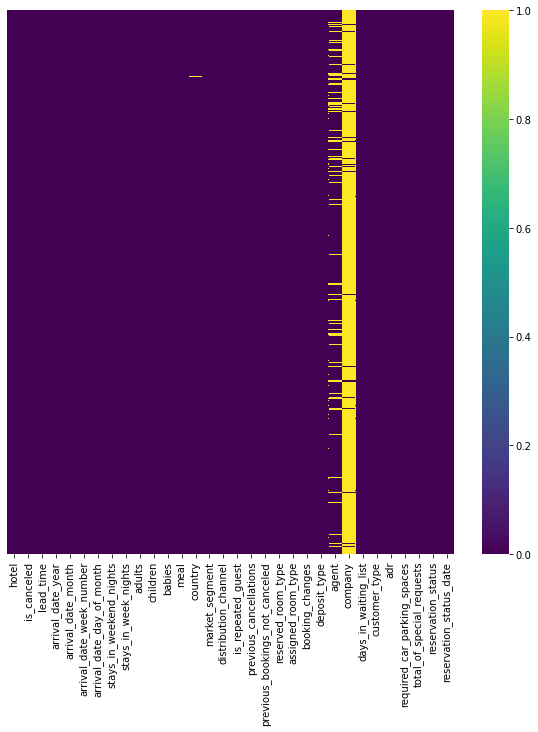

In [26]:


plt.figure(figsize= (10,10))
sns.heatmap(data = df.isna(), yticklabels=False, cmap = 'viridis')

## Treating Missing values

In [27]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [52]:
df.drop('company', axis = 1, inplace = True)

In [53]:
df.country.fillna('Other Country', inplace = True)

In [12]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [54]:
df.dropna(subset = ['agent', 'children'], inplace = True)

## Heat map - showing correlation 

<AxesSubplot:>

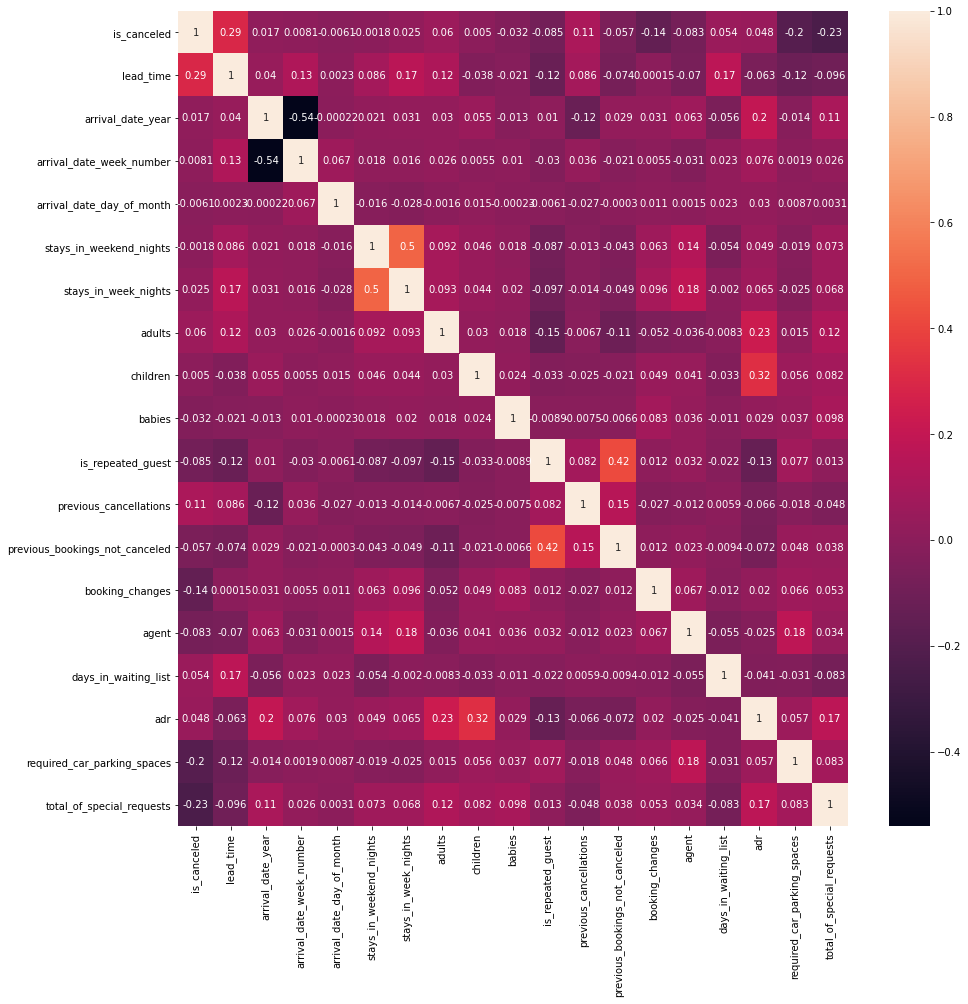

In [30]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot = True)

## Dependent variable - count plot

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

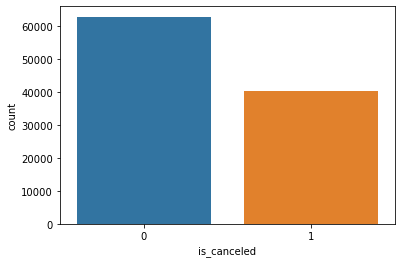

In [15]:
sns.countplot(x = df.is_canceled)

In [16]:
# The feature is_canceled is slightly imbalanced

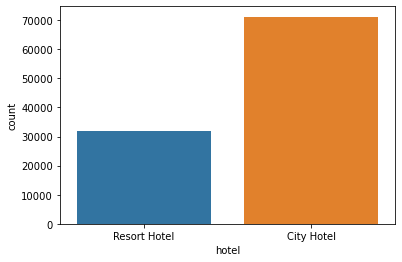

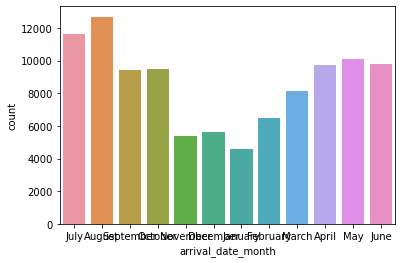

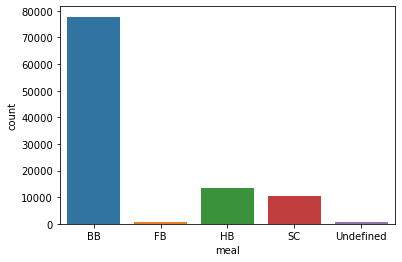

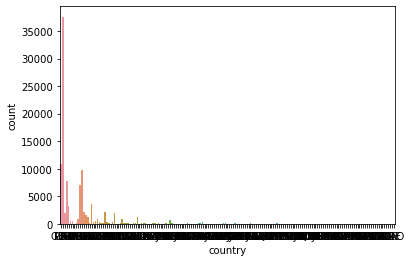

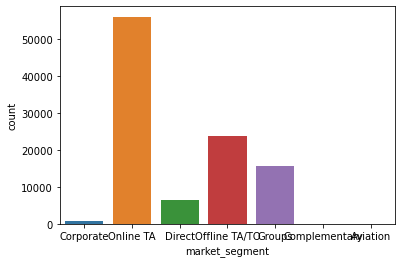

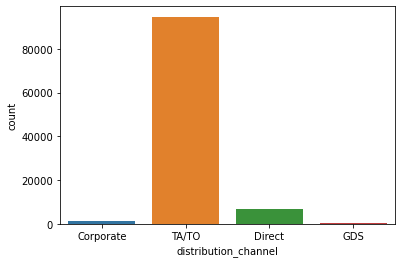

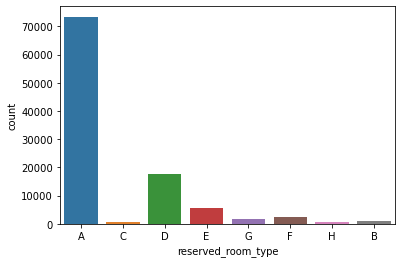

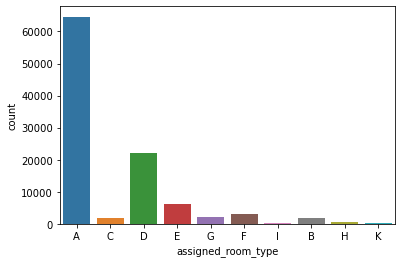

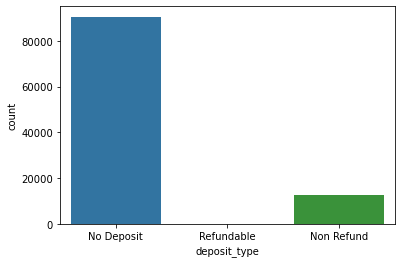

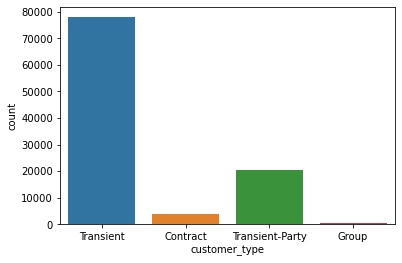

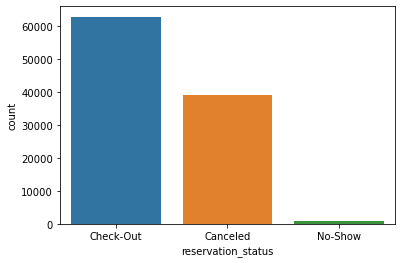

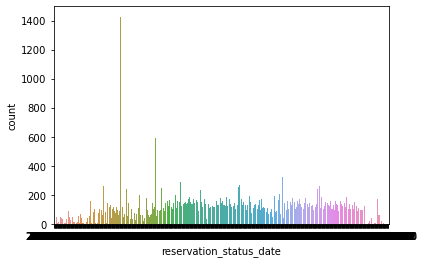

<Figure size 432x288 with 0 Axes>

In [17]:
for i in df.select_dtypes('object'):
    sns.countplot(x = df[i])
    plt.figure()

## Encoding categorical variables

In [ ]:
# split the data into numeric and categorical

In [55]:
numeric = list(df.select_dtypes(exclude='O'))


In [56]:
categoric = list(df.select_dtypes(include='O'))

In [57]:
df = pd.get_dummies(columns=categoric, data = df, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data

In [59]:
x = df.drop('is_canceled', axis = 1)
y = df.is_canceled

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, test_size= 0.3)

## Building the model

## 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
model.score(x_train, y_train)*100

97.85396420501019

In [82]:
model.score(x_test, y_test)*100

97.86834869804302

### Train Score 0.9785
### Test  Score 0.9786

## 2. Random Forest Algorithm

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =400 , 
                               random_state = 0)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=0)

In [79]:
rf.score(x_train, y_train)*100

100.0

In [80]:
rf.score(x_test, y_test)*100

100.0

### Train Score 1
### Test  Score 1